In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import os
os.chdir("/content/drive/MyDrive//금융데이터 공모전")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df= pd.read_excel("머신러닝을 위한 학습자료(월을 기준으로 합쳐서 숫자화).xlsx")
df=df.iloc[:,:-5]

In [ ]:
df=df.drop(columns='품목대분류코드')

In [ ]:
df

,기준년월,품목중분류코드,성별,연령,가구생애주기,시군구,법정동코드,매출금액,매출건수
0,201903,1010,0,40.0,3,구로구,11530109.0,782521,13
1,201903,2110,0,20.0,2,구로구,11530109.0,963789,29
2,201903,1913,0,30.0,2,구로구,11530109.0,924309,46
3,201903,2111,0,30.0,2,구로구,11530109.0,1089360,54
4,201903,1710,0,30.0,2,구로구,11530109.0,1656740,58
...,...,...,...,...,...,...,...,...,...
306117,202103,2013,0,30.0,1,영등포구,11560108.0,1411368,7
306118,202103,2110,1,30.0,1,영등포구,11560108.0,1386040,63
306119,202103,1113,0,30.0,2,영등포구,11560108.0,390818,7
306120,202103,1610,1,40.0,3,영등포구,11560108.0,327592,7


In [ ]:
df["기준년월"]=df["기준년월"].apply(lambda x : 3 if (x == 201903 or 202003 or 202103) else 9 )

In [ ]:
pattern=df.drop(columns=['매출금액'])

In [ ]:
# pattern = df[['매출건수']].groupby([df['기준년월'],df['성별'],df['연령'],df['가구생애주기'],df['법정동코드'], df['품목중분류코드']]).sum()
# pattern.to_csv("Gpattern(구매패턴분석, 품목으로 묶어서 매출건수합).csv")

In [ ]:
# pattern= pd.read_csv("Gpattern(구매패턴분석, 품목으로 묶어서 매출건수합).csv")
# pattern

In [ ]:
pattern=pd.get_dummies(data=df, columns=['품목중분류코드'], prefix=['품목'])

In [ ]:
a=pattern['매출건수'].values
for i in range(8,58):
    q=pattern.iloc[:,i]
    pattern.iloc[:,i]=np.multiply(q,a)
pattern=pattern.drop(columns='매출건수')

In [ ]:
pattern.to_csv("pattern(중분류코드값을 매출건수로 편집).csv")

## 1. 가구형태 예측하기

In [ ]:
 pattern= pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv")

In [ ]:
pattern=pattern.drop(columns=['Unnamed: 0','기준년월','성별','연령','시군구','법정동코드','매출금액'])

In [ ]:
# pattern

In [ ]:
X=pattern.iloc[:,1:]
y=pattern.iloc[:,[0]]

In [ ]:
X

,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2110,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0
306118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0,0,0,0,0,0
306119,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,가구생애주기
0,3
1,2
2,2
3,2
4,2
...,...
306117,1
306118,1
306119,2
306120,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.29      0.23      0.26     14814
           2       0.35      0.75      0.48     21289
           3       0.28      0.07      0.11     12151
           4       0.17      0.02      0.03      9478
           5       0.13      0.00      0.00      3493

    accuracy                           0.33     61225
   macro avg       0.24      0.21      0.17     61225
weighted avg       0.28      0.33      0.25     61225



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
featureImportance

array([0.01866334, 0.00950806, 0.01083982, 0.00485793, 0.01541402,
       0.00971011, 0.01503192, 0.00860696, 0.01019333, 0.01357758,
       0.01933558, 0.01141053, 0.01686722, 0.00182563, 0.0060848 ,
       0.00669829, 0.0027442 , 0.00847452, 0.00381363, 0.00736966,
       0.01183848, 0.01502111, 0.00977416, 0.00712813, 0.01655468,
       0.02935415, 0.03617906, 0.05071899, 0.03026041, 0.04723775,
       0.01127721, 0.01145018, 0.03613027, 0.00447344, 0.03419543,
       0.03628798, 0.01622204, 0.03139044, 0.01258334, 0.01117378,
       0.01729216, 0.02654719, 0.0428091 , 0.14181767, 0.04794065,
       0.0229654 , 0.0028765 , 0.01730373, 0.01750288, 0.0026666 ])

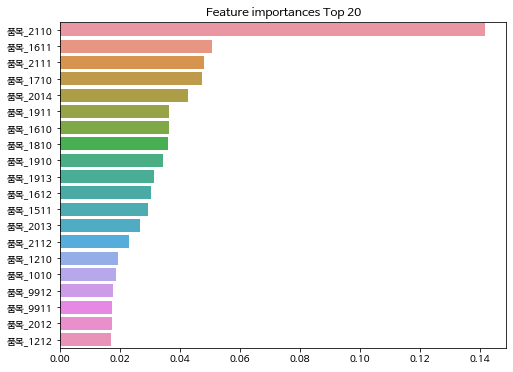

In [ ]:
##상위 10개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgbc = xgb.XGBClassifier(max_depth=10, n_estimators=50, colsample_bytree=0.5, learning_rate=0.1,subsample=1,min_child_weight=0.8) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train, y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

0.3492690894242548


In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           1       0.34      0.05      0.08     14814
           2       0.35      0.97      0.51     21289
           3       0.42      0.01      0.03     12151
           4       0.00      0.00      0.00      9478
           5       0.00      0.00      0.00      3493

    accuracy                           0.35     61225
   macro avg       0.22      0.20      0.12     61225
weighted avg       0.29      0.35      0.20     61225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


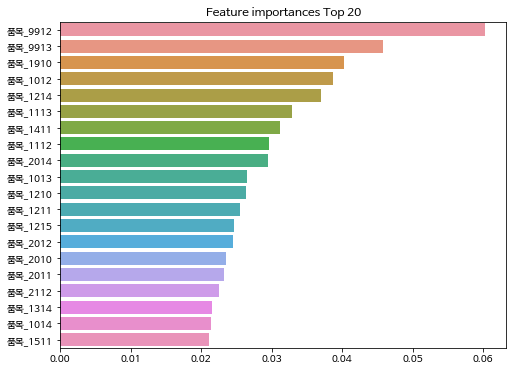

In [ ]:
##상위 10개 중요한 피처
importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

2.성별 예측

In [ ]:
pattern= pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv")

In [ ]:
pattern=pattern.drop(columns=['Unnamed: 0','기준년월','연령','시군구','법정동코드','매출금액','가구생애주기'])

In [ ]:
pattern

,성별,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2110,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0
306118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0,0,0,0,0,0
306119,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=pattern.iloc[:,1:]
y=pattern.iloc[:,[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


0.4.3
Class=0, n=195384 (63.826%)
Class=1, n=110738 (36.174%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


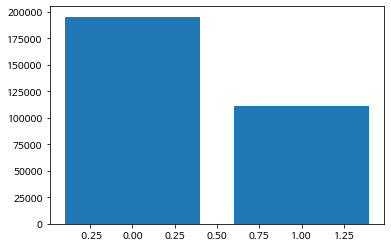

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
count_and_plot(y.to_numpy().ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76     39133
           1       0.48      0.14      0.22     22092

    accuracy                           0.63     61225
   macro avg       0.57      0.53      0.49     61225
weighted avg       0.59      0.63      0.57     61225



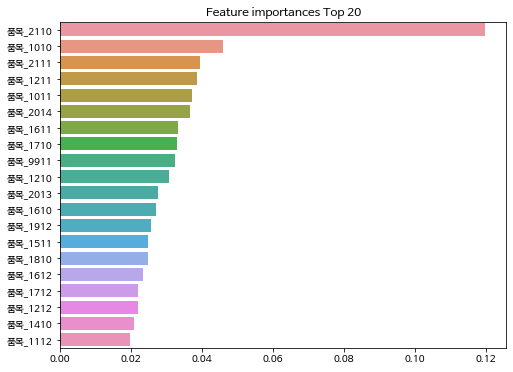

In [ ]:
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgbc = xgb.XGBClassifier(max_depth=10, n_estimators=100, colsample_bytree=1, learning_rate=0.01,subsample=1,min_child_weight=0.8) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train, y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

0.6397550020416497


In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     39133
           1       0.59      0.01      0.01     22092

    accuracy                           0.64     61225
   macro avg       0.62      0.50      0.39     61225
weighted avg       0.62      0.64      0.50     61225



In [ ]:
#xgb 상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

AttributeError: ignored

### weight unbalance 문제를 undersampling을 이용해 조절



0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


Class=0, n=110738 (50.000%)
Class=1, n=110738 (50.000%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


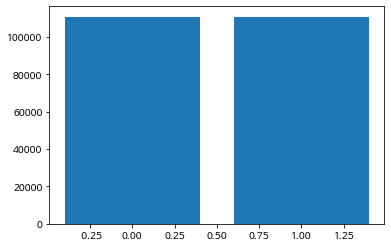

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
X_resample, y_resample= RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53     22060
           1       0.58      0.76      0.66     22236

    accuracy                           0.60     44296
   macro avg       0.61      0.60      0.59     44296
weighted avg       0.61      0.60      0.59     44296



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
featureImportance

array([0.04964858, 0.04198002, 0.008117  , 0.00183487, 0.01955733,
       0.0174093 , 0.0170658 , 0.02160307, 0.0187734 , 0.02002719,
       0.03275667, 0.040164  , 0.02385626, 0.00158858, 0.00816575,
       0.02118238, 0.00444229, 0.01201428, 0.00427049, 0.00811327,
       0.00708007, 0.02263127, 0.01169011, 0.00540293, 0.01191131,
       0.02290865, 0.0276781 , 0.03298942, 0.02317589, 0.0334053 ,
       0.00933775, 0.02312333, 0.02620418, 0.00815491, 0.01202699,
       0.02254918, 0.02785641, 0.02018176, 0.00868473, 0.00508527,
       0.01949267, 0.02458768, 0.03011698, 0.10520267, 0.03494209,
       0.01717317, 0.00344476, 0.02621198, 0.00302363, 0.00115624])

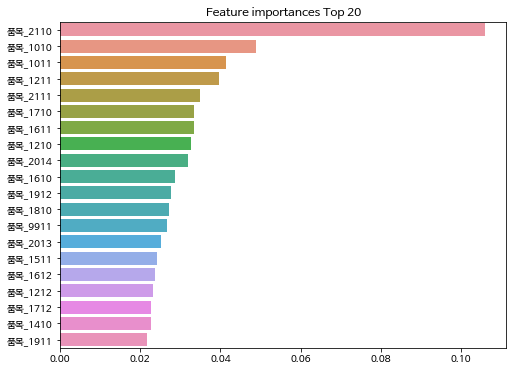

In [ ]:
##상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
xgbc = xgb.XGBClassifier(max_depth=10, n_estimators=100, colsample_bytree=1, learning_rate=0.01,subsample=1,min_child_weight=0.8) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train, y_train.ravel())
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

0.5864186382517609


In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.76      0.25      0.37     22060
           1       0.55      0.92      0.69     22236

    accuracy                           0.59     44296
   macro avg       0.66      0.59      0.53     44296
weighted avg       0.66      0.59      0.53     44296



### oversampling 방법 성능은 좋지만 오류가 생길 가능성이 있기 때문에 왠만하면 undersampling으로 사용

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=195384 (50.000%)
Class=1, n=195384 (50.000%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


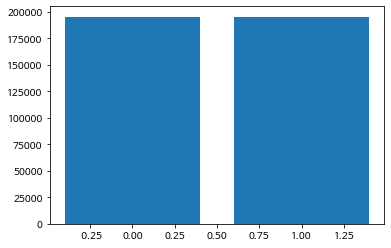

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.over_sampling import RandomOverSampler
X_resample, y_resample= RandomOverSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54     39208
           1       0.58      0.78      0.67     38946

    accuracy                           0.61     78154
   macro avg       0.63      0.61      0.60     78154
weighted avg       0.63      0.61      0.60     78154



In [ ]:
featureImportance = baseline.feature_importances_

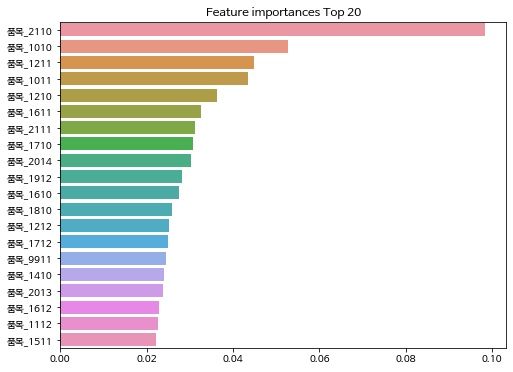

In [ ]:
##상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## 만약 다른거는 안보고 구매품목간의 상관관계만 고려 한다면?

In [ ]:
pattern= pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv")

In [ ]:
pattern=pattern.drop(columns=['Unnamed: 0'])

In [ ]:
pattern = pattern.iloc[:,7:].groupby([pattern['법정동코드']]).sum()

In [ ]:
pattern

,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2110,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
법정동코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11110101.0,25,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,5,0,0,0,17,103,162,14,60,0,0,33,0,0,21,0,0,0,0,13,9,41,966,25,0,0,0,0,0
11110102.0,0,0,0,0,0,0,0,0,0,4,6,0,9,0,0,0,0,0,0,0,0,0,0,0,4,4,25,60,12,107,0,0,18,0,0,6,0,0,0,0,0,5,37,556,24,0,0,0,0,0
11110104.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,0,0,0,0,0,0
11110105.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0
11110106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,0,145,26,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11740106.0,698,223,355,14,660,203,547,163,154,385,736,296,507,0,32,71,10,113,9,38,47,510,171,36,524,1712,1894,2598,1282,2918,105,206,1753,79,189,1086,483,965,297,73,588,1240,2877,19767,2206,663,0,406,50,0
11740107.0,1707,480,967,81,1722,442,1283,503,395,1089,1805,661,1333,7,56,149,55,331,67,295,192,1109,388,206,1240,3376,4164,5797,3384,6534,378,679,4340,234,901,3084,1045,2774,884,373,965,3405,6306,48418,6450,1625,28,1869,69,7
11740108.0,1451,448,797,98,1390,435,1423,425,350,903,1691,626,1384,5,96,144,36,284,88,210,111,1189,476,120,1136,3312,3956,5772,3310,6411,361,787,4083,198,824,2402,1033,2455,852,269,1042,3653,5122,46467,6210,1681,5,1226,56,4


## 지역별로 매출건수를 sum을 하고 구매품목간의 상관관계를 분석해보았다.지역을 기준으로 매출건수를 합하게 되면 지역 안에서는 구매가 이루어지는 패턴이 비슷하다고 가정하고 그럼 이를 개별화된 개체로 간주하고 분석할 수 있을 것이라고 생각했다. 물론 지역간 비교를 하면 구매품목과 수량에서는 차이가 있겠지만 지역안에서 구매패턴을 분석하는 것은 유의미하다고 생각됨.

## 그래서 회귀분석을 통해 특정 물품들의 구매건수가 타겟 물품의 구매건수에 얼만큼 영향을 미치는지 분석해 보았다. 

### 1. (여성의류)~ 임산용품 , 디지털 , 영유아 용품 

In [ ]:
X = pattern[['품목_1010', '품목_1710','품목_1910','품목_2013']]
y = pattern['품목_1912']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42 )

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula = '품목_1912 ~ 품목_1010 + 품목_1710 + 품목_1910+ 품목_2013', data = pattern)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                품목_1912   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.215e+04
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:29:18   Log-Likelihood:                -2243.1
No. Observations:                 423   AIC:                             4496.
Df Residuals:                     418   BIC:                             4516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.1856      3.089     -4.268      0.000     -19.258      -7.113
품목_1010        0.2195      0.038      5.780      0.000       0.145       0.294
품목_1710        0.0551      0.010      5.424      0.000       0.035       0.075
품목_1910        0.0454      0.032      1.429      0.154      -0.017       0.108
품목_2013        0.0891      0.012      7.491      0.000       0.066       0.112
==============================================================================
Omnibus:                      123.179   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2146.202
Skew:                           0.742   Prob(JB):                         0.00
Kurtosis:                      13.935   Cond. No.                     5.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_) 

-16.241786733699712


In [ ]:
### 각 요소들이 가격에 얼만큼 영향을 미치는지 알 수 있다. 
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
품목_1010,0.196361
품목_1710,0.059981
품목_1910,0.123948
품목_2013,0.074961


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 30.078722982369673
MSE: 2660.7191702988675
RMSE: 51.58215941872604
R^2: 0.992


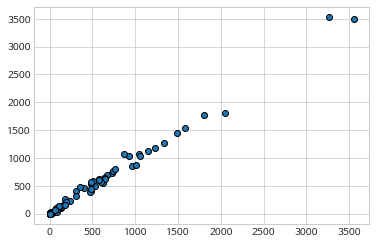

In [ ]:
predictions = lm.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')

### 2. 디지털~ 소파/의자, 테이블가구, 인테리어소품, DIY자재>>> 의미 없는 결과 나옴 

In [ ]:
X = pattern[['품목_1511', '품목_1312','품목_1313','품목_1411','품목_1412']]
y = pattern['품목_1912']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42 )

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula = '품목_1311~ 품목_1312  +품목_1313 + 품목_1411 + 품목_1412', data = pattern)
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                품목_1311   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.200
Date:                Fri, 06 Aug 2021   Prob (F-statistic):           8.59e-06
Time:                        16:18:49   Log-Likelihood:            -5.6123e+05
No. Observations:              306122   AIC:                         1.122e+06
Df Residuals:                  306117   BIC:                         1.123e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1123      0.003     40.688      0.000       0.107       0.118
품목_1312       -0.0104      0.005     -2.035      0.042      -0.020      -0.000
품목_1313       -0.0070      0.003     -2.712      0.007      -0.012      -0.002
품목_1411       -0.0044      0.001     -3.319      0.001      -0.007      -0.002
품목_1412       -0.0067      0.003     -2.580      0.010      -0.012      -0.002
==============================================================================
Omnibus:                   698854.851   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6090813718.214
Skew:                          22.128   Prob(JB):                         0.00
Kurtosis:                     692.610   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_) 

0.4276884038801364


In [ ]:
### 각 요소들이 가격에 얼만큼 영향을 미치는지 알 수 있다. 
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
품목_1311,-0.019513
품목_1312,-0.038848
품목_1313,-0.026889
품목_1411,-0.017141
품목_1412,-0.025364


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 0.805231102039707
MSE: 20.77974639494036
RMSE: 4.558480711261194
R^2: 0.000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


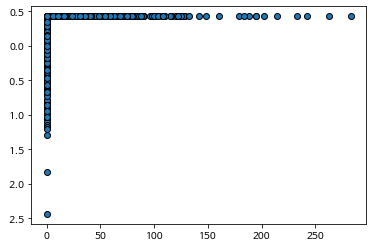

In [ ]:
predictions = lm.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')

### 2. 법정동별 아파트 평균가격~ 소파/의자, 테이블가구, 인테리어소품, DIY자재
>>> 설명변수 이러한 매출건수가 많다는 건 이사 수요가 많다는 것을 예상할 수 있음 이것이 부동산가격이랑 관련성이 있는지 회귀 분석

In [ ]:
# price_apart = pd.read_excel("2020년서울아파트가격(법정동코드별).xlsx")

In [ ]:
# price_apart['평방제곱가격']=price_apart['물건금액']/price_apart['건물면적']

In [ ]:
# q1=price_apart.iloc[:,[0]]
# q2=price_apart.iloc[:,[13]]

# price_apart=pd.concat([q1,q2], axis=1)
# price_apart

,법정동코드,평방제곱가격
0,1129013800,1.250000e+07
1,1129013400,1.415595e+07
2,1153010200,2.845528e+06
3,1117011500,1.393787e+07
4,1117012900,1.140773e+07
...,...,...
88548,1144010900,1.066258e+07
88549,1144010200,1.170054e+07
88550,1144012500,6.828436e+06
88551,1144012500,7.060485e+06


In [ ]:
# price_apart=price_apart.groupby('법정동코드').mean()

In [ ]:
# price_apart.to_csv("price_apart.csv")
price_apart=pd.read_csv("price_apart.csv", encoding='cp949')
price_apart

,법정동코드,평방제곱가격
0,11110102,7.426110e+06
1,11110113,8.828844e+06
2,11110115,1.145537e+07
3,11110117,7.874439e+06
4,11110118,9.483852e+06
...,...,...
317,11740106,1.062787e+07
318,11740107,1.194254e+07
319,11740108,9.132646e+06
320,11740109,1.023566e+07


In [ ]:
 pattern= pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv")

In [ ]:
pattern=pattern.drop(columns=['Unnamed: 0','기준년월','성별','연령','시군구','매출금액','가구생애주기'])

In [ ]:
pattern = pattern.iloc[:,1:].groupby([pattern['법정동코드']]).sum()

In [ ]:
regConsumption=pattern.to_csv("regConsumption.csv")
regConsumption=pd.read_csv('regConsumption.csv')
regConsumption

,법정동코드,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2110,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
0,11110101.0,25,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,5,0,0,0,17,103,162,14,60,0,0,33,0,0,21,0,0,0,0,13,9,41,966,25,0,0,0,0,0
1,11110102.0,0,0,0,0,0,0,0,0,0,4,6,0,9,0,0,0,0,0,0,0,0,0,0,0,4,4,25,60,12,107,0,0,18,0,0,6,0,0,0,0,0,5,37,556,24,0,0,0,0,0
2,11110104.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,0,0,0,0,0,0
3,11110105.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0
4,11110106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,0,145,26,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,11740106.0,698,223,355,14,660,203,547,163,154,385,736,296,507,0,32,71,10,113,9,38,47,510,171,36,524,1712,1894,2598,1282,2918,105,206,1753,79,189,1086,483,965,297,73,588,1240,2877,19767,2206,663,0,406,50,0
419,11740107.0,1707,480,967,81,1722,442,1283,503,395,1089,1805,661,1333,7,56,149,55,331,67,295,192,1109,388,206,1240,3376,4164,5797,3384,6534,378,679,4340,234,901,3084,1045,2774,884,373,965,3405,6306,48418,6450,1625,28,1869,69,7
420,11740108.0,1451,448,797,98,1390,435,1423,425,350,903,1691,626,1384,5,96,144,36,284,88,210,111,1189,476,120,1136,3312,3956,5772,3310,6411,361,787,4083,198,824,2402,1033,2455,852,269,1042,3653,5122,46467,6210,1681,5,1226,56,4
421,11740109.0,1894,607,1051,61,1734,434,1471,575,571,1150,1999,755,1433,58,200,216,52,393,80,201,129,1306,521,187,1452,3804,4858,5869,3832,6961,394,890,4496,231,897,2389,1161,2426,1048,362,1140,3873,6400,59926,8517,2004,9,2083,118,18


In [ ]:
regConsumption=regConsumption.astype(float).astype(int)

In [ ]:
df_join=pd.merge(regConsumption, price_apart, how= 'left',left_on ='법정동코드', right_on ='법정동코드')
df_join

,법정동코드,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2110,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913,평방제곱가격
0,11110101,25,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,5,0,0,0,17,103,162,14,60,0,0,33,0,0,21,0,0,0,0,13,9,41,966,25,0,0,0,0,0,NaN
1,11110102,0,0,0,0,0,0,0,0,0,4,6,0,9,0,0,0,0,0,0,0,0,0,0,0,4,4,25,60,12,107,0,0,18,0,0,6,0,0,0,0,0,5,37,556,24,0,0,0,0,0,7.426110e+06
2,11110104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,0,0,0,0,0,0,NaN
3,11110105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,NaN
4,11110106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,0,145,26,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,11740106,698,223,355,14,660,203,547,163,154,385,736,296,507,0,32,71,10,113,9,38,47,510,171,36,524,1712,1894,2598,1282,2918,105,206,1753,79,189,1086,483,965,297,73,588,1240,2877,19767,2206,663,0,406,50,0,1.062787e+07
419,11740107,1707,480,967,81,1722,442,1283,503,395,1089,1805,661,1333,7,56,149,55,331,67,295,192,1109,388,206,1240,3376,4164,5797,3384,6534,378,679,4340,234,901,3084,1045,2774,884,373,965,3405,6306,48418,6450,1625,28,1869,69,7,1.194254e+07
420,11740108,1451,448,797,98,1390,435,1423,425,350,903,1691,626,1384,5,96,144,36,284,88,210,111,1189,476,120,1136,3312,3956,5772,3310,6411,361,787,4083,198,824,2402,1033,2455,852,269,1042,3653,5122,46467,6210,1681,5,1226,56,4,9.132646e+06
421,11740109,1894,607,1051,61,1734,434,1471,575,571,1150,1999,755,1433,58,200,216,52,393,80,201,129,1306,521,187,1452,3804,4858,5869,3832,6961,394,890,4496,231,897,2389,1161,2426,1048,362,1140,3873,6400,59926,8517,2004,9,2083,118,18,1.023566e+07


In [ ]:
df_join=df_join.fillna(0)

데이터 정제 완료

In [ ]:
##회귀분석 시작 아파트 평균가격~ 수납가구, 소파/의자, 테이블가구, 인테리어소품, DIY자재

In [ ]:
X = df_join[['품목_1311', '품목_1312','품목_1313','품목_1411','품목_1412']]
y = df_join['평방제곱가격']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42 )

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula = '평방제곱가격 ~ 품목_1311 + 품목_1312 + 품목_1313 + 품목_1411 + 품목_1412', data = df_join)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 평방제곱가격   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     12.61
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           2.05e-11
Time:                        03:33:34   Log-Likelihood:                -7171.3
No. Observations:                 423   AIC:                         1.435e+04
Df Residuals:                     417   BIC:                         1.438e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.077e+06   3.22e+05     22.007      0.000    6.45e+06    7.71e+06
품목_1311     -114.5062   1.11e+04     -0.010      0.992    -2.2e+04    2.18e+04
품목_1312    -1.039e+05   2.01e+04     -5.173      0.000   -1.43e+05   -6.44e+04
품목_1313     9111.1054   1.42e+04      0.643      0.521   -1.87e+04     3.7e+04
품목_1411     2.977e+04   7380.215      4.034      0.000    1.53e+04    4.43e+04
품목_1412    -1.541e+04    1.5e+04     -1.027      0.305   -4.49e+04    1.41e+04
==============================================================================
Omnibus:                       13.528   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.980
Skew:                           0.309   Prob(JB):                      0.00413
Kurtosis:                       2.508   Cond. No.                         437.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_) 

7431793.859343731


In [ ]:
### 각 요소들이 가격에 얼만큼 영향을 미치는지 알 수 있다. 
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
품목_1311,3894.896196
품목_1312,-89142.919395
품목_1313,628.805758
품목_1411,23280.493684
품목_1412,-8289.926910


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 4980384.550828713
MSE: 36066697450445.83
RMSE: 6005555.548860224
R^2: 0.170


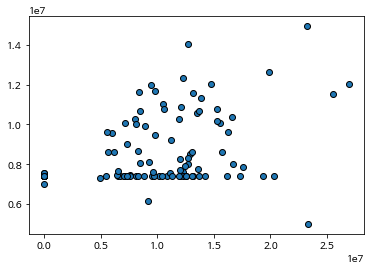

In [ ]:
predictions = lm.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')